In [289]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import warnings
import time
from sklearn.metrics import pairwise_distances

# DBSCAN

In [290]:
import numpy as np

def find_neighbors(point_idx, X, eps):
    """Возвращает индексы точек в ε-окрестности (включая саму точку)."""
    return [idx for idx, point in enumerate(X)
            if np.linalg.norm(X[point_idx] - point) <= eps]

def clustering(X, eps, min_samples):
    # len =
    labels = np.full(X.shape[0], -1)  # Изначально все точки считаются шумом (-1)
    cluster_id = 0
    visited = set()

    for point_idx in range(X.shape[0]):
        if point_idx in visited:
            continue

        visited.add(point_idx)
        neighbors = find_neighbors(point_idx, X, eps)

        if len(neighbors) >= min_samples:
            # Начинаем новый кластер
            cluster_id += 1
            labels[point_idx] = cluster_id

            # Расширяем кластер
            queue = list(neighbors)
            for n in queue:
              if labels[n] == -1:  # Если точка еще не принадлежит кластеру
                  labels[n] = cluster_id

              if n not in visited:
                  visited.add(n)
                  n_neighbors = find_neighbors(n, X, eps)

                  if len(n_neighbors) >= min_samples:  # корневая точка
                      queue += [nb for nb in n_neighbors if nb not in queue]

    return labels

In [291]:
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_wine
from sklearn.datasets import load_iris


data = load_iris()
X = data.data
X = StandardScaler().fit_transform(X)

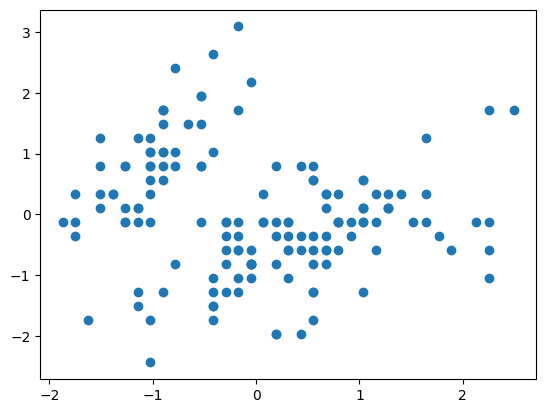

In [292]:
plt.scatter(X[:,0], X[:,1])

In [293]:
start_time = time.time()
labels_custom_oris = clustering(X, 0.5, 5)
end_time = time.time()
time_DBSCAN_cust_1 = end_time - start_time
labels_custom_oris # так как cluster_id = 0, то в отличие от библиотечной версии, номер метки начинается с 1

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  2,
        2,  2,  2,  2,  2, -1, -1,  2, -1, -1,  2, -1,  2,  2,  2,  2,  2,
       -1,  2,  2,  2, -1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
       -1,  2, -1,  2,  2,  2,  2,  2, -1,  2,  2,  2,  2, -1,  2, -1,  2,
        2,  2,  2, -1, -1, -1, -1, -1,  2,  2,  2,  2, -1,  2,  2, -1, -1,
       -1,  2,  2, -1,  2,  2, -1,  2,  2,  2, -1, -1, -1,  2,  2,  2, -1,
       -1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2, -1,  2])

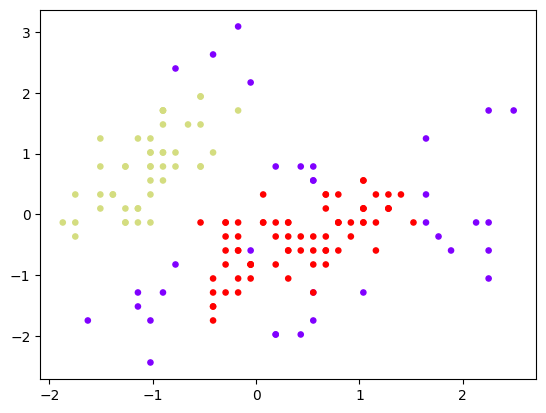

In [294]:
plt.scatter(X[:,0], X[:,1],  marker='o', s=14, c=labels_custom_oris, cmap='rainbow')

In [295]:
from sklearn.cluster import DBSCAN

start_time = time.time()
db = DBSCAN(eps=0.5, min_samples=5).fit(X)
sklearn_labels_iris = db.labels_
end_time = time.time()
time_dbscan_sklearn = end_time - start_time
sklearn_labels_iris

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1, -1, -1,  1, -1, -1,  1, -1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1, -1,  1,
        1,  1,  1, -1, -1, -1, -1, -1,  1,  1,  1,  1, -1,  1,  1, -1, -1,
       -1,  1,  1, -1,  1,  1, -1,  1,  1,  1, -1, -1, -1,  1,  1,  1, -1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1])

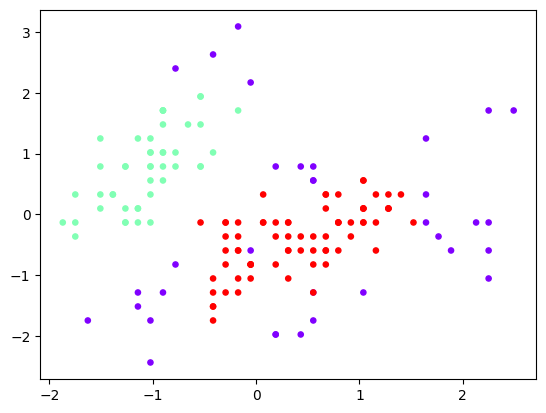

In [296]:
plt.scatter(X[:,0], X[:,1], marker='o', s=14, c=sklearn_labels_iris, cmap='rainbow')

In [297]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("ankit8467/dataset-for-dbscan")

print("Path to dataset files:", path)
data = pd.read_csv(path+"/Clustering_gmm (2).csv")
X_wine = data  # Признаки
X_wine = StandardScaler().fit_transform(X_wine)

Path to dataset files: /root/.cache/kagglehub/datasets/ankit8467/dataset-for-dbscan/versions/1


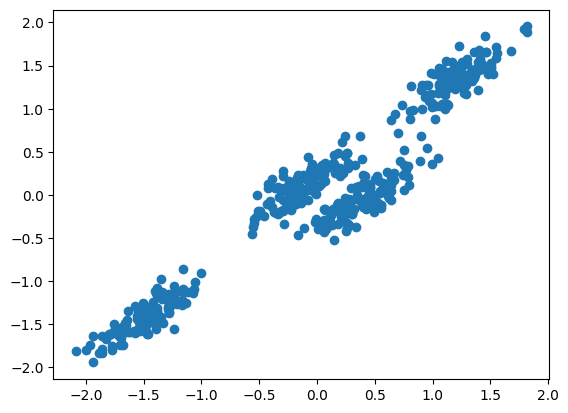

In [298]:
plt.scatter(X_wine[:,0], X_wine[:,1])

Так как вручную подобрать epsilon и min_samples не получилось, использую метод поиска параметров через силуэтный коэффициент

#### Формула силуэтного коэффициента
$$s(i) = \frac{b(i) - a(i)}{\max(a(i), b(i))},$$
  где для каждой точки вычисляется:
1. $a(i)$ — среднее расстояние от точки $i$ до всех других точек в её кластере.
2. $b(i)$ — среднее расстояние от точки $i$ до всех точек в ближайшем соседнем кластере.



In [299]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import decimal

# диапазоны для eps и min_samples
eps_values = np.linspace(0.1, 5.0, 10)
min_samples_values = range(2, 10, 1)

best_score = -1
best_eps = 0
best_min_samples = 0

for eps in eps_values:
    for ms in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=ms)
        labels = dbscan.fit_predict(X_wine)

        # Пропускаем случаи с одним кластером или только шумом
        if len(np.unique(labels)) < 2:
            continue

        score = silhouette_score(X_wine, labels)
        # Высокий силуэтный коэффициент(близкий к единице) указывает на хорошее разделение кластеров
        if score > best_score:
            best_score = score
            best_eps = eps
            best_min_samples = ms

print(f"Лучшие параметры: eps={best_eps:.2f}, min_samples={best_min_samples}")
print(f"Силуэтный коэффициент: {best_score:.2f}")

Лучшие параметры: eps=0.10, min_samples=4
Силуэтный коэффициент: 0.54


In [300]:
start_time = time.time()
labels_custom_wine = clustering(X_wine, 0.1, 4)
end_time = time.time()
time_DBSCAN_cust_2 = end_time - start_time
labels_custom_wine

array([ 1, -1,  2,  2, -1,  3,  3,  2,  2,  4,  3,  1,  3,  4,  2,  2,  1,
        2,  4,  2,  2,  1,  3,  4,  2,  4,  1,  3,  4,  3,  3,  3,  1,  3,
        3, -1,  4,  2,  4,  1,  4, -1,  2,  1,  3,  1,  2,  2,  1,  1,  4,
        4, -1,  2,  2,  3,  3,  4, -1,  1,  1,  4,  1,  1,  1,  3,  2,  1,
        2,  3,  4,  2,  4,  1,  4,  1,  3,  3,  2,  2,  4,  2,  4,  2,  2,
        3,  4,  4,  1,  4,  4,  4,  1,  4,  2,  2,  1, -1,  1,  2,  4,  4,
        1,  4,  2,  2,  3,  1,  2,  4,  4,  3,  4,  4,  1,  4,  1,  2,  3,
        1,  2,  4,  1,  1,  4,  1,  1,  1,  1,  4,  2,  4,  3,  4,  4,  4,
        2,  1,  2,  3, -1,  1,  1,  1,  3,  4,  2,  2,  3,  4, -1,  1,  2,
        2,  2,  3,  3,  1,  3,  2,  1,  2,  1, -1,  3,  3, -1,  2,  4,  3,
        1,  4,  1,  3,  2,  4,  2,  4,  4,  4,  1,  1, -1,  2,  3,  4,  3,
        1,  3,  4,  1,  3,  4,  3,  3,  4,  2,  3,  2,  4,  4,  2,  3,  3,
        2,  3,  3,  2,  3, -1,  3,  1, -1,  1,  2,  1,  3,  4,  4,  4,  2,
        1,  3,  4,  3,  1

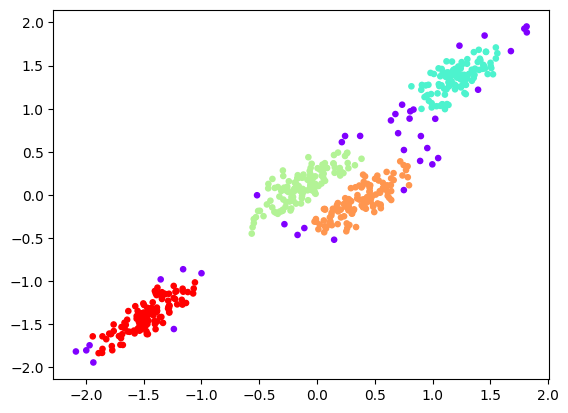

In [301]:
plt.scatter(X_wine[:,0], X_wine[:,1],  marker='o', s=14, c=labels_custom_wine, cmap='rainbow')

In [302]:
start_time = time.time()
db = DBSCAN(eps=0.1, min_samples=4).fit(X_wine)
sklearn_labels_wine = db.labels_
end_time = time.time()
time_dbscan_sklearn_wine = end_time - start_time
sklearn_labels_wine

array([ 0, -1,  1,  1, -1,  2,  2,  1,  1,  3,  2,  0,  2,  3,  1,  1,  0,
        1,  3,  1,  1,  0,  2,  3,  1,  3,  0,  2,  3,  2,  2,  2,  0,  2,
        2, -1,  3,  1,  3,  0,  3, -1,  1,  0,  2,  0,  1,  1,  0,  0,  3,
        3, -1,  1,  1,  2,  2,  3, -1,  0,  0,  3,  0,  0,  0,  2,  1,  0,
        1,  2,  3,  1,  3,  0,  3,  0,  2,  2,  1,  1,  3,  1,  3,  1,  1,
        2,  3,  3,  0,  3,  3,  3,  0,  3,  1,  1,  0, -1,  0,  1,  3,  3,
        0,  3,  1,  1,  2,  0,  1,  3,  3,  2,  3,  3,  0,  3,  0,  1,  2,
        0,  1,  3,  0,  0,  3,  0,  0,  0,  0,  3,  1,  3,  2,  3,  3,  3,
        1,  0,  1,  2, -1,  0,  0,  0,  2,  3,  1,  1,  2,  3, -1,  0,  1,
        1,  1,  2,  2,  0,  2,  1,  0,  1,  0, -1,  2,  2, -1,  1,  3,  2,
        0,  3,  0,  2,  1,  3,  1,  3,  3,  3,  0,  0, -1,  1,  2,  3,  2,
        0,  2,  3,  0,  2,  3,  2,  2,  3,  1,  2,  1,  3,  3,  1,  2,  2,
        1,  2,  2,  1,  2, -1,  2,  0, -1,  0,  1,  0,  2,  3,  3,  3,  1,
        0,  2,  3,  2,  0

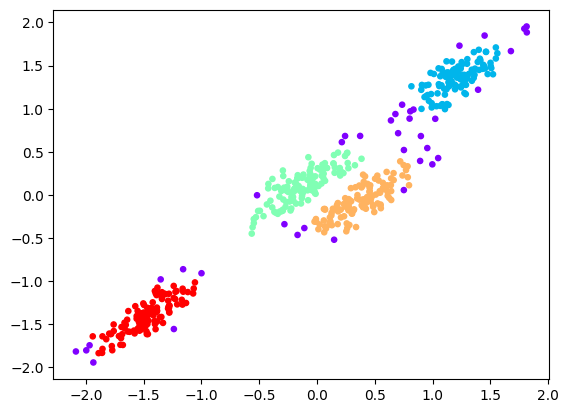

In [303]:
plt.scatter(X_wine[:,0], X_wine[:,1], marker='o', s=14, c=sklearn_labels_wine, cmap='rainbow')

In [304]:
# Функция для вычисления метрик
# === Функции для вычисления метрик ===
def compute_intra_cluster_distance(X, labels):
    """
    Вычисляет среднее внутрикластерное расстояние:
    Для каждого кластера берутся все пары точек внутри кластера,
    затем считается среднее расстояние по всем кластерам (шум (-1) исключается).
    """
    unique_labels = np.unique(labels)
    intra_dists = []
    for label in unique_labels:
        if label == -1:
            continue  # пропускаем шум
        cluster_points = X[labels == label]
        if cluster_points.shape[0] < 2:
            continue
        dists = pairwise_distances(cluster_points)
        # Выбираем верхний треугольник без диагонали
        triu_idx = np.triu_indices_from(dists, k=1)
        intra_dists.append(np.mean(dists[triu_idx]))
    return np.mean(intra_dists) if intra_dists else 0

def compute_inter_cluster_distance(X, labels):
    """
    Вычисляет среднее межкластерное расстояние:
    Сначала вычисляются центроиды кластеров (шум (-1) исключается),
    затем рассчитывается среднее евклидово расстояние между всеми парами центроидов.
    """
    unique_labels = np.unique(labels)
    centroids = []
    for label in unique_labels:
        if label == -1:
            continue
        cluster_points = X[labels == label]
        centroids.append(np.mean(cluster_points, axis=0))
    centroids = np.array(centroids)
    if centroids.shape[0] < 2:
        return 0
    dists = pairwise_distances(centroids)
    triu_idx = np.triu_indices_from(dists, k=1)
    return np.mean(dists[triu_idx])

def compute_metrics(X, labels, algorithm_name):
    intra = compute_intra_cluster_distance(X, labels)
    inter = compute_inter_cluster_distance(X, labels)
    print(f"{algorithm_name}:")
    print(f"  Среднее внутрикластерное расстояние: {intra:.4f}")
    print(f"  Среднее межкластерное расстояние: {inter:.4f}")

In [305]:
print("=== Результаты для Iris ===")
compute_metrics(X, labels_custom_oris, "Кастомный DBSCAN")
print("  Время работы: ", time_DBSCAN_cust_1)

compute_metrics(X, sklearn_labels_iris, "Sklearn DBSCAN")
print("  Время работы: ", time_dbscan_sklearn)

=== Результаты для Iris ===
Кастомный DBSCAN:
  Среднее внутрикластерное расстояние: 1.1175
  Среднее межкластерное расстояние: 3.2271
  Время работы:  0.15744471549987793
Sklearn DBSCAN:
  Среднее внутрикластерное расстояние: 1.1175
  Среднее межкластерное расстояние: 3.2271
  Время работы:  0.0045244693756103516


In [307]:
print("=== Результаты для второго датасета ===")
compute_metrics(X_wine, labels_custom_wine, "Кастомный DBSCAN")
print("  Время работы: ", time_DBSCAN_cust_2)

compute_metrics(X_wine, sklearn_labels_wine, "Sklearn DBSCAN")
print("  Время работы: ", time_dbscan_sklearn_wine)

=== Результаты для второго датасета ===
Кастомный DBSCAN:
  Среднее внутрикластерное расстояние: 0.3241
  Среднее межкластерное расстояние: 2.0234
  Время работы:  0.9647636413574219
Sklearn DBSCAN:
  Среднее внутрикластерное расстояние: 0.3241
  Среднее межкластерное расстояние: 2.0234
  Время работы:  0.005223989486694336
